### Data Exploration in Pandas ###

Pandas is very useful for basic statistical exploration. Along the way, we will also learn some basic munging of data with Pandas.

First, we download all the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
JPY = pd.read_csv('JPY.csv')
EUR = pd.read_csv('EUR.csv')
CNY = pd.read_csv('CNY.csv')

We can check the type of data imported quite easily.

In [3]:
type(JPY)

pandas.core.frame.DataFrame

Check how the data looks like

In [4]:
JPY.head(3)

,Unnamed: 0,DATE,RATE
0,0,2000-01-01,102.254548
1,1,2000-01-02,102.254548
2,2,2000-01-03,101.697917


As you can see, we need to get rid of one column, and set DATE as the index

In [5]:
JPY = JPY.drop(['Unnamed: 0'], axis=1)
JPY.DATE = pd.to_datetime(JPY.DATE)
JPY = JPY.set_index('DATE')
EUR = EUR.drop(['Unnamed: 0'], axis=1)
EUR.DATE = pd.to_datetime(EUR.DATE)
EUR = EUR.set_index('DATE')
CNY = CNY.drop(['Unnamed: 0'], axis=1)
CNY.DATE = pd.to_datetime(CNY.DATE)
CNY = CNY.set_index('DATE')

In [6]:
JPY.head(2)

,RATE
DATE,
2000-01-01,102.254548
2000-01-02,102.254548


And plotting is easy peasy, as we have seen previously.

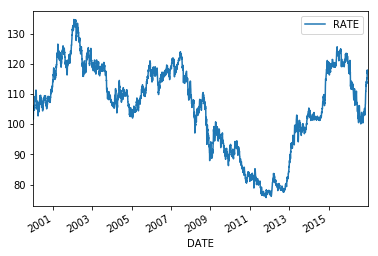

In [7]:
JPY.plot()

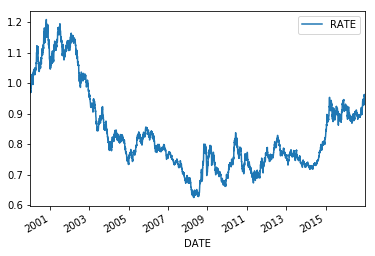

In [8]:
EUR.plot()

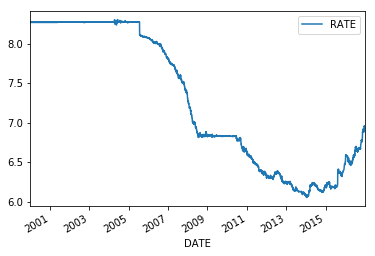

In [9]:
CNY.plot()

In [10]:
CURR = pd.concat([EUR, JPY, CNY], axis=1)

In [11]:
CURR.head(3)

,RATE,RATE,RATE
DATE,,,
2000-01-01,0.993161,102.254548,8.2700
2000-01-02,0.993161,102.254548,8.2700
2000-01-03,0.980273,101.697917,8.2749


In [12]:
CURR.columns = (['EUR', 'JPY', 'CNY'])

In [13]:
CURR.head(3)

,EUR,JPY,CNY
DATE,,,
2000-01-01,0.993161,102.254548,8.2700
2000-01-02,0.993161,102.254548,8.2700
2000-01-03,0.980273,101.697917,8.2749


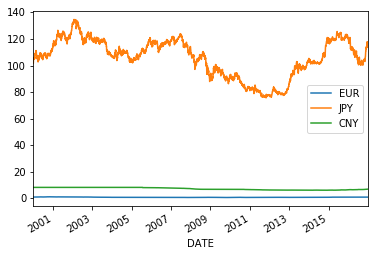

In [14]:
CURR.plot()

To get a quick overview of the key stats of each of the data columns

In [15]:
CURR.describe()

,EUR,JPY,CNY
count,6208.000000,6208.000000,6208.000000
mean,0.838429,105.907207,7.277037
std,0.135689,14.186355,0.859943
min,0.625360,75.751979,6.050878
25%,0.742399,97.086614,6.394626
50%,0.791576,107.924893,6.917480
75%,0.903531,117.887326,8.273500
max,1.207977,134.653341,8.306763


And for all the stats, such as -
count - to count the number of items in each column

In [16]:
CURR.count()

EUR    6208
JPY    6208
CNY    6208
dtype: int64

To get the minimum level for each column

In [17]:
CURR.min()

EUR     0.625360
JPY    75.751979
CNY     6.050878
dtype: float64

To get the minimum level for each column

In [18]:
CURR.max()

EUR      1.207977
JPY    134.653341
CNY      8.306763
dtype: float64

To get the median for each column

In [19]:
CURR.median()

EUR      0.791576
JPY    107.924893
CNY      6.917480
dtype: float64

To get the variance of each column

In [20]:
CURR.var()

EUR      0.018411
JPY    201.252670
CNY      0.739501
dtype: float64

To get the standard deviation for each column

In [21]:
CURR.std()

EUR     0.135689
JPY    14.186355
CNY     0.859943
dtype: float64

The skew

In [22]:
CURR.skew()

EUR    0.971406
JPY   -0.496577
CNY    0.025748
dtype: float64

And the kurtosis

In [23]:
CURR.kurt()

EUR   -0.011773
JPY   -0.684617
CNY   -1.721453
dtype: float64

The correlation

In [24]:
CURR.corr()

,EUR,JPY,CNY
EUR,1.000000,0.566675,0.531240
JPY,0.566675,1.000000,0.571543
CNY,0.531240,0.571543,1.000000


And finally the covariance between all 3 currencies

In [25]:
CURR.cov()

,EUR,JPY,CNY
EUR,0.018411,1.090808,0.061987
JPY,1.090808,201.252670,6.972508
CNY,0.061987,6.972508,0.739501
